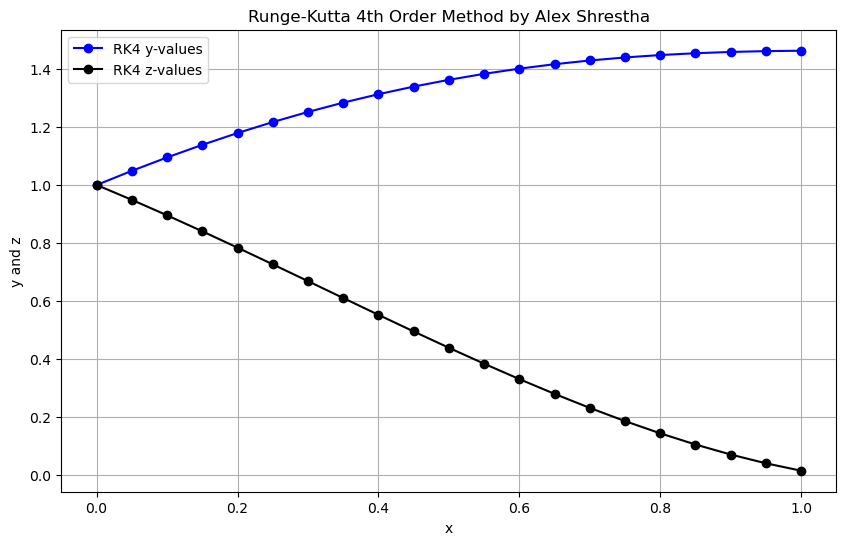

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x, y, z):
    return z

def dzdx(x, y, z):
    return x**2 - y

def rk4(x0, y0, z0, xn, h):
    n = int((xn - x0) / h)
    x = x0
    y = y0
    z = z0
    x_rk4 = [x]
    y_rk4 = [y]
    z_rk4 = [z]
    for i in range(n):
        k1 = h * dydx(x, y, z)
        l1 = h * dzdx(x, y, z)
        k2 = h * dydx(x + h/2, y + k1/2, z + l1/2)
        l2 = h * dzdx(x + h/2, y + k1/2, z + l1/2)
        k3 = h * dydx(x + h/2, y + k2/2, z + l2/2)
        l3 = h * dzdx(x + h/2, y + k2/2, z + l2/2)
        k4 = h * dydx(x + h, y + k3, z + l3)
        l4 = h * dzdx(x + h, y + k3, z + l3)
        z = z + (l1 + 2*l2 + 2*l3 + l4) / 6
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        x = x + h
        x_rk4.append(x)
        y_rk4.append(y)
        z_rk4.append(z)
    return np.array(x_rk4), np.array(y_rk4), np.array(z_rk4)

def plot_rk4(x_rk4, y_rk4, z_rk4):
    plt.figure(figsize=(10, 6))
    plt.plot(x_rk4, y_rk4, marker='o', label='RK4 y-values', color='blue')
    plt.plot(x_rk4, z_rk4, marker='o', label='RK4 z-values', color='black')
    plt.title('Runge-Kutta 4th Order Method by Alex Shrestha')
    plt.xlabel('x')
    plt.ylabel('y and z')
    plt.legend()
    plt.grid()
    plt.show()

x0 = 0
y0 = 1
z0 = 1
xn = 1
h = 0.05

x_rk4, y_rk4, z_rk4 = rk4(x0, y0, z0, xn, h)
plot_rk4(x_rk4, y_rk4, z_rk4)

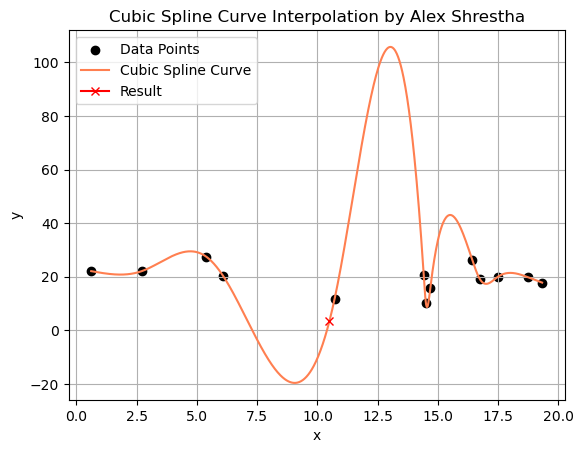

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def cubicSpline(x, y, value):
    n = len(x)
    for i in range(n):
        if value == x[i]:
            return y[i]
    h = np.diff(x)

    A = np.zeros((n, n))
    B = np.zeros(n)

    A[0, 0] = 1
    A[n-1, n-1] = 1

    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        B[i] = 6 * ((y[i+1] - y[i])/h[i] - (y[i] - y[i-1])/h[i-1])

    M = np.linalg.solve(A, B)
    
    i = np.searchsorted(x, value) - 1

    return (M[i+1]/(6*h[i]) * (value - x[i])**3 - M[i]/(6*h[i])*(value - x[i+1])**3 + (y[i+1]/h[i] - M[i+1]*h[i]/6)*(value - x[i]) - (y[i]/h[i] - M[i]*h[i]/6)*(value - x[i+1]))

def plotCubicSpline(x, y, x_value):
    plt.scatter(x, y, marker='o', color="#000000", label="Data Points")
    x_curve = np.linspace(x[0], x[-1], 1000)
    y_curve = [cubicSpline(x, y, i) for i in x_curve]
    plt.plot(x_curve, y_curve, color="coral", label ="Cubic Spline Curve")
    plt.plot(x_value, cubicSpline(x,y, x_value), color="#ff0000", label = 'Result', marker='x')
    plt.title("Cubic Spline Curve Interpolation by Alex Shrestha")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend()
    plt.show()

# Generate 13 random (x, y) pairs, sort by x, and assign to x and y
points = np.random.uniform([[0, 0]], [[20, 30]], (13, 2))
points = points[points[:, 0].argsort()]
x = points[:, 0]
y = points[:, 1]
x_value = 10.5
plotCubicSpline(x, y, x_value)